In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_light_curve = np.genfromtxt('ExoCTK_results.txt',usecols=[8,10],skip_header=2)

c1 = np.mean(data_light_curve[:,0])
c2 = np.mean(data_light_curve[:,1])

In [3]:
Rstar_m = 0.73*6.957e8        # stellar radiaii in m (1 Rsun = 6957e8 m)
Rj = 71492                   # jupiter radiaii in m
Rp_m = 0.949*Rj              # planet radiaii in m
a_m = 0.0384*149597870707   # semi-major axis in m (1 AU = 149597870707 m)

Rp = Rp_m/Rstar_m            # planet radius in (host) stellar radiaii
a = a_m/Rstar_m              # semi-major axis in (host) stellar radiaii

In [4]:
params = batman.TransitParams()
params.t0 = 0.                            #  #time of inferior conjunction
params.per = 3.21                           #orbital period
params.rp = Rp                              #planet radius (in units of stellar radii)
params.a = a                                #semi-major axis (in units of stellar radii)    1 AU = 149597870707 m ; 1 Rsun = 6957e8 m
params.inc = 90.                          #  #orbital inclination (in degrees)
params.ecc = 0.                           #  #eccentricity
params.w = 90.                            #  #longitude of periastron (in degrees)
params.u = [c1, c2]                         #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"              #limb darkening model

In [5]:
t = np.linspace(-0.15, 0.15, 100)
m = batman.TransitModel(params, t)          #initializes model
flux = m.light_curve(params)                #calculates light curve

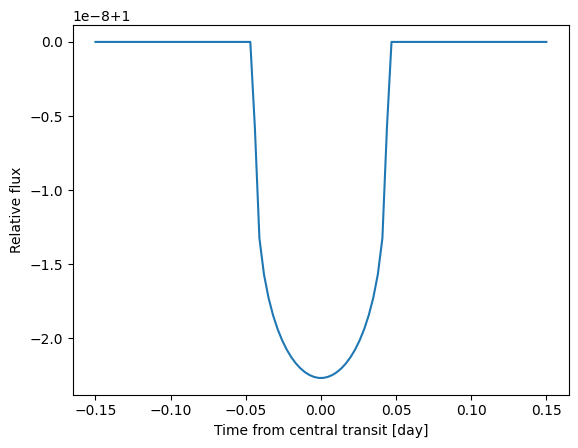

In [6]:
plt.plot(t, flux)
plt.xlabel("Time from central transit [day]")
plt.ylabel("Relative flux")
plt.savefig('HAT-P-12b_assignment1_taskF.png')
# plt.show()